# Code Written by:
**Shweta Tiwari**
*20 Oct 2023*

## Algorithm: Bipartiteness

In [1]:
import time

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Algorithm

In [3]:
%%time
def test_bipartiteness(graph):
    partition = {}
    nodes = [(i, None) for i in graph]

    while nodes:
        node, color = nodes.pop()

        # assign default color
        if color is None:
            color = partition.get(node, 0)

        # test bipartiteness
        if node in partition:
            if partition[node] != color:
                raise ValueError('graph is not bipartite')
            continue

        # assign partition, DFS
        partition[node] = color
        nodes.extend((i, 1 - color) for i in graph[node])

    return partition

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


# Run

## Graph #1

In [4]:
%%time
graph = nx.complete_multipartite_graph(5, 5)
partition = test_bipartiteness(graph)
partition

CPU times: user 145 µs, sys: 30 µs, total: 175 µs
Wall time: 179 µs


{9: 0, 4: 1, 8: 0, 3: 1, 7: 0, 2: 1, 6: 0, 1: 1, 5: 0, 0: 1}

CPU times: user 35.5 ms, sys: 942 µs, total: 36.4 ms
Wall time: 46.6 ms


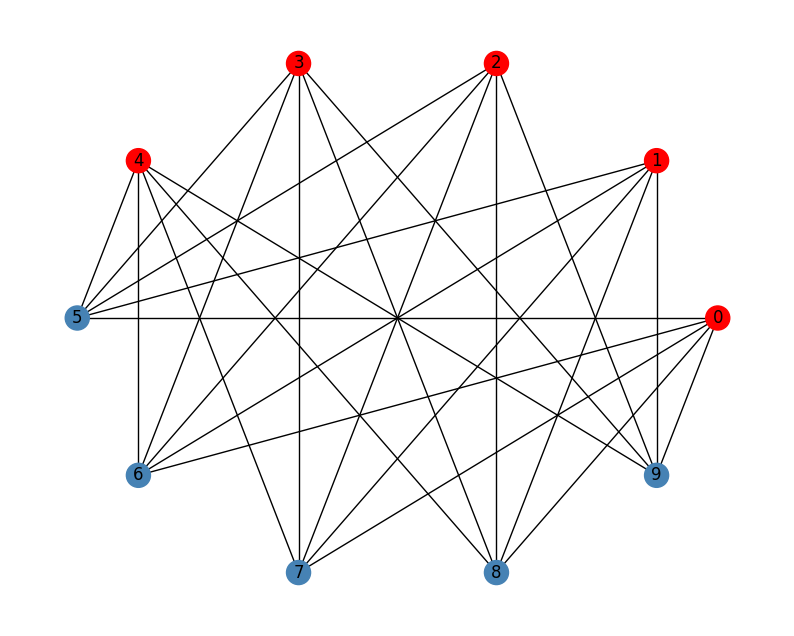

In [5]:
%%time
plt.figure(figsize=(10, 8))
plt.axis('off')

colors = ['steelblue', 'red']
node_color = [colors[partition[i]] for i in graph]
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, pos=pos, node_color=node_color)

## Graph #2

In [6]:
%%time
graph = nx.circulant_graph(10, [1])
partition = test_bipartiteness(graph)
partition

CPU times: user 316 µs, sys: 0 ns, total: 316 µs
Wall time: 341 µs


{9: 0, 8: 1, 7: 0, 6: 1, 5: 0, 4: 1, 3: 0, 2: 1, 1: 0, 0: 1}

CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
Wall time: 32.3 ms


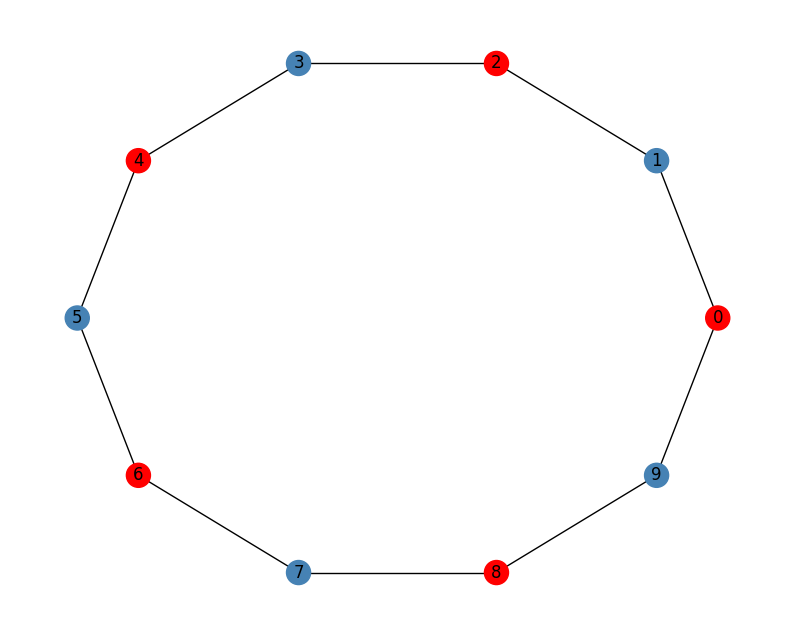

In [7]:
%%time
plt.figure(figsize=(10, 8))
plt.axis('off')

colors = ['steelblue', 'red']
node_color = [colors[partition[i]] for i in graph]
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, pos=pos, node_color=node_color)

## Graph #3

In [8]:
%%time
try:
    graph = nx.complete_multipartite_graph(2, 2, 2)
    test_bipartiteness(graph)
except ValueError as e:
    print(e)

graph is not bipartite
CPU times: user 674 µs, sys: 0 ns, total: 674 µs
Wall time: 678 µs


CPU times: user 23.4 ms, sys: 3.17 ms, total: 26.6 ms
Wall time: 25.8 ms


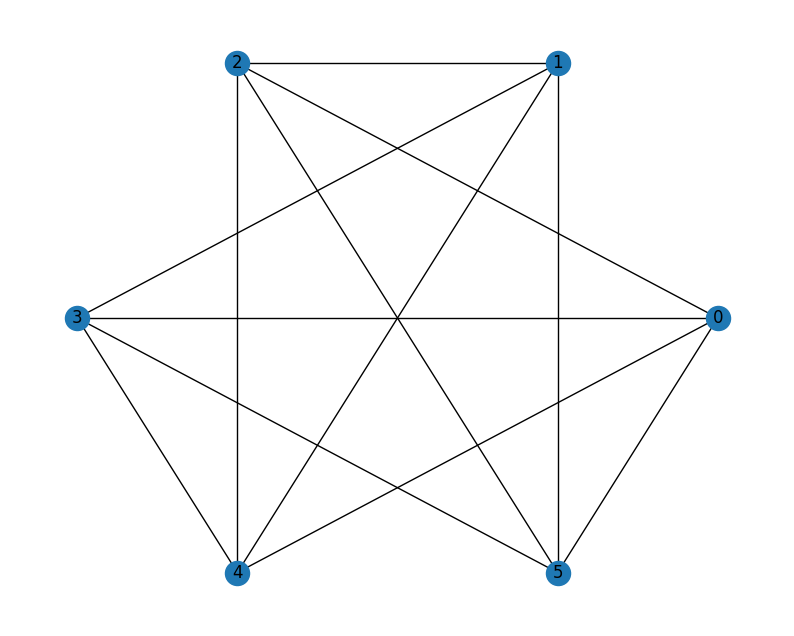

In [9]:
%%time
plt.figure(figsize=(10, 8))
plt.axis('off')

nx.draw_networkx(graph, pos=nx.circular_layout(graph))

# The End